# INFO371 Lab: Cross-sectional and Before-after estimator

## Instructions

Please submit your jupyter notebooks (.ipynb files) with your answers. 

Please do not just provide computer output.  Always comment on your
main findings.  Also limit your output: do not submit pages and pages of
whatever your code spits out.

Working together is fun and useful but you have to submit your own
work.  Discussing the solutions and problems with your classmates is
all right but do not copy-paste their solution!  Please list all your
collaborators below:

* name
* ...

---
# Was Montana Meth Prevention Project Effective?

Your task is to determine if Montana Meth Prevention Project (MMP) was
effective in decreasing the methamphetamine use among Montana teens.

### Background and Data
Montana state conducted an agressive ad campaign in 2006 to decrease the
meth abuse by the youth.  

Your task is to analyze the efficacy of the campaign using Youth Risk
Behavior Survey (YRBS) data.  You will implement a) cross-sectional estimator, and b) before-after estimator.  The sample necessary for this lab is on canvas.  The full data and documentation can be obtained from [here](https://www.cdc.gov/healthyyouth/data/yrbs/data.htm).

The variables in the sample are:
* year -- survey year (2003-2009)
* age -- age, 14-17 years
* sex -- M,F
* meth -- 1 = has used methamphetamines in life
* tv -- 1 = watches more than 1hr TV on average schoolday (a large
  number of the project ads were displayed on TV).
* state -- MT = Montana, XX = national sample

An overview of what the dataframe looks like can be seen in the table generated by the code below: 

In [1]:
#this code loads in the dataset and shows you a brief overview of what the dataset looks like

import pandas as pd

yrbs_df = pd.read_csv('yrbs.tsv', sep='\t', header=0)
yrbs_df

,year,age,sex,meth,tv,state
0,2003,13,M,0,1,XX
1,2003,13,M,1,1,XX
2,2003,13,M,1,1,XX
3,2003,13,M,0,1,XX
4,2003,13,M,0,0,XX
...,...,...,...,...,...,...
58072,2009,17,F,0,0,MT
58073,2009,17,F,0,0,MT
58074,2009,17,F,0,0,MT
58075,2009,17,F,0,0,MT


And here is how the average meth use data looks on a graph for different years and states:

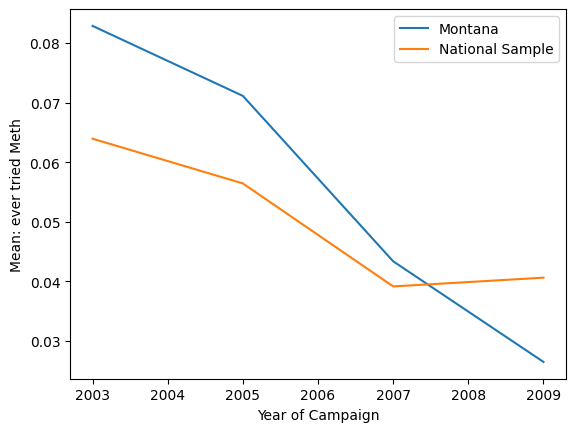

In [2]:
import matplotlib.pyplot as plt

#this line does a groupby and summarize
group_df = yrbs_df.groupby(["year", "state"]).agg({'meth': "mean"})

group_df.unstack().plot(xlabel = "Year of Campaign", ylabel = "Mean: ever tried Meth")
plt.legend(["Montana", "National Sample"])

---
## Cross-Sectional Estimator

If the project had an effect, Montana should have lower rate of meth use after the campaign ended.  
Now compare the meth use (mean value) in Montana and nationally after the project.  Interpret the most important outcomes, and compare the results for all three approaches.


1. Load the data
2. In this data, what is outcome, what is treatment?
3. Do it as a simple table: compare the average post-project meth use in MT and nationally.
    * Hint: consider creating an auxiliary variable ''after''.
    * Hint 2: the result should be `-0.0018`.
4. Why should you compare only the post-project years here?
5. Do it using regression without any other controls. You should get exactly the same result.
6. Interpret the result: what does the number mean?  (You should have gotten 0.0018.)  Is it statistically significant?
7. What is the identifying assumption for this approach?  Do you think this is credible?

In [4]:
#code goes here -- feel free to use more cells 

# 1. Load the data
# data was loaded above 

# 2. In this data, what is outcome, what is treatment?
# The outcome is the proportion of individuals who have tried meth in their life. 
# The treatment is the Montana Meth Prevention (MPP) campaign. 

# 3. Do it as a simple table: compare the average post-project meth use in MT and nationally.
#     * Hint: consider creating an auxiliary variable ''after''.
#     * Hint 2: the result should be `-0.0018`.

# first filter the dataframe to include only post-project years
post_project = yrbs_df[yrbs_df['year'] > 2006]

# calculate the mean meth use for Montana and the national sample
mean_meth_mt = post_project[post_project['state'] == 'MT']['meth'].mean()
mean_meth_national = post_project[post_project['state'] == 'XX']['meth'].mean()

# difference
difference = mean_meth_mt - mean_meth_national
print(difference)

# 4. Why should you compare only the post-project years here?
# We whould only compare the post-project years so we can see the effects of implementing the project. 
# By doing so, we are able to see whether the project is effective or not. 

# 5. Do it using regression without any other controls. You should get exactly the same result.
import numpy as np
from sklearn.linear_model import LinearRegression

# separating data for data post 2006
after = yrbs_df[(yrbs_df['year'] > 2006)]

after['state'].replace({'XX': 0, 'MT': 1}, inplace=True)

model = LinearRegression().fit(after[['state']],after[['meth']])

print("Intercept:", model.intercept_[0])
print("Coefficient for state:", model.coef_[0][0])

# 6. Interpret the result: what does the number mean?  (You should have gotten 0.0018.)  Is it statistically significant?
# -0.0018 represents the difference in mean meth samples between Montana meth users and the national average. 
# As the number is negative, this means that Montana's meth usage rate is lower than the national average. 
# The number is statistically significant, as it is less than the p-value of 0.05. This means we can reject the null hypothesis. 

# 7. What is the identifying assumption for this approach?  Do you think this is credible?
# The identifying assumption for this approach is that the differences observed between the national sample and Montana's methamphetime usage is due to Montana's implementation of the MPP program. 
# Additionally, it also assumes that the national coefficient will stay the same. 
# However, there may be other variables that influence the different rates between the two (Montana and national) such as other programs, increased regulations, etc. 
# Therefore, I would assume that this is credible without more information. 

-0.001807976101252995
Intercept: 0.03992273019961364
Coefficient for state: -0.0018079761012529628


/var/folders/kx/340vw2q92kz1dhjf73jdjy5h0000gn/T/ipykernel_21115/3430333598.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after['state'].replace({'XX': 0, 'MT': 1}, inplace=True)


---
## Before-After Estimator

Alternatively, if the campaign had any effect, it should have decreased the methamphetamine use in Montana.  Let's compare the meth use (mean value) in Montana before and after the campaign.  In each case interpret the most important outcomes, and
compare the results for all three approaches.

1. Do it as a simple table: just present the average meth use in MT before and after the campaign.
    * Hint: you have to focus on a single state only (which?).  
2. Do it using regression without any other controls (no age, sex, tv).
3. Interpret the results.  What does the number you get (you should get `-0.0386`) mean?  Is it statistically significant?
4. What is the identifying assumption for this approach?
5. Compare the identifying assumption for CS and BA estimators. Which one do you find more convincing?


In [13]:
#code goes here -- feel free to use more cells 

# 1. Do it as a simple table: just present the average meth use in MT before and after the campaign.
#     * Hint: you have to focus on a single state only (which?).  

# filter the data for Montana only
montana = yrbs_df[yrbs_df['state'] == 'MT']

# divide the data into before and after the campaign 
before_campaign = montana[montana['year'] < 2006]
after_campaign = montana[montana['year'] >= 2006]

# mean meth use calc before and after the campaign
mean_before_campaign = before_campaign['meth'].mean()
mean_after_campaign = after_campaign['meth'].mean()

print("Average Meth Use in Montana Before the Campaign:", mean_before_campaign)
print("Average Meth Use in Montana After the Campaign:", mean_after_campaign)

# 2. Do it using regression without any other controls (no age, sex, tv).

# finding whether the year is before or after 2006 
montana['time'] = (montana['year'] > 2006).astype(int)

# Fit the linear regression model
model = LinearRegression().fit(montana[['time']],montana[['meth']])

# Get the coefficient (slope)
slope = model.coef_[0]

# Print the regression results
print("Slope:", slope)

# 3. Interpret the results.  What does the number you get (you should get `-0.0386`) mean?  Is it statistically significant?
# The number -0.0386 represents a decrease in meth usage in Montana after the campaign. 
# This represents the change in mean meth usage after the implementation of the campaign. 
# This number is statistically sifnificant, as it is less than the p-value of 0.05. This means we can reject the null hypothesis 

# 4. What is the identifying assumption for this approach?
# The identifying assumption is that any changes in methamphetamine usage is due to the implementation of the campaign. 
# This assumption also assumes that there are no other significant factors influencing the change. 

# 5. Compare the identifying assumption for CS and BA estimators. Which one do you find more convincing?
# Cross-sectional assumes that any observed changes between Montana and the national sample is solely due to the implementation fo the campaign. 
# Cross sectional can be less convincing because it may overlook any potential confounding variables. 

# Before-after assumes that the change in meth usage in Montana before and after the campaign is solely due to the implementation of the campaign. 
# This assumption could be more convincing because this method isolates the effect of the campaign. 
# This method will also directly compare trends within Montana over time, controlling for other factors also remains constant. 
# We can easily see the differences before the campaign was implemented, then the differences for after it was implemented. 

# As a result, I find that the Before-After estimator is more convincing due to the direct comparison of trends within the same state over time. 
# This helps isolate the effect of the campaign, as opposed to cross-sectional. 



Average Meth Use in Montana Before the Campaign: 0.07673368896183833
Average Meth Use in Montana After the Campaign: 0.038114754098360654
Slope: [-0.03861893]


/var/folders/kx/340vw2q92kz1dhjf73jdjy5h0000gn/T/ipykernel_21115/1024230267.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  montana['time'] = (montana['year'] > 2006).astype(int)
